In [50]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [51]:
IMAGE_SIZE = 256
BATCH_SIZE=6
CHANNELS =3
EPOCHS =50

In [52]:
 dataset =tf.keras.preprocessing.image_dataset_from_directory("LAPTOP",
                                                   shuffle=True,
                                                   image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                  batch_size = BATCH_SIZE)

Found 252 files belonging to 2 classes.


In [53]:
class_names = dataset.class_names 
class_names

['GOOD', 'POOR']

In [54]:
len(dataset)

42

In [55]:
16*16

256

In [56]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(6, 256, 256, 3)
[0 1 1 0 1 1]


In [57]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[194.       149.        81.      ]
  [193.16406  148.16406   80.16406 ]
  [191.54688  146.54688   78.546875]
  ...
  [173.       129.        66.      ]
  [173.       129.        66.      ]
  [173.       129.        66.      ]]

 [[192.89062  147.89062   79.890625]
  [191.591    146.591     78.591   ]
  [190.28583  145.28583   77.28583 ]
  ...
  [173.       129.        66.      ]
  [173.       129.        66.      ]
  [173.       129.        66.      ]]

 [[191.22656  146.22656   78.22656 ]
  [189.7702   144.7702    76.7702  ]
  [188.5705   143.5705    75.570496]
  ...
  [172.74219  128.74219   65.74219 ]
  [172.74219  128.74219   65.74219 ]
  [172.74219  128.74219   65.74219 ]]

 ...

 [[ 69.421875  50.421875  34.195312]
  [ 68.66431   50.28473   31.981384]
  [ 65.46747   45.75653   24.139343]
  ...
  [ 48.        37.        15.      ]
  [ 48.        37.        15.      ]
  [ 48.        37.        15.      ]]

 [[ 72.44531   53.890625  35.554688]
  [ 68.357056  50.266052  29.794556]


In [58]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


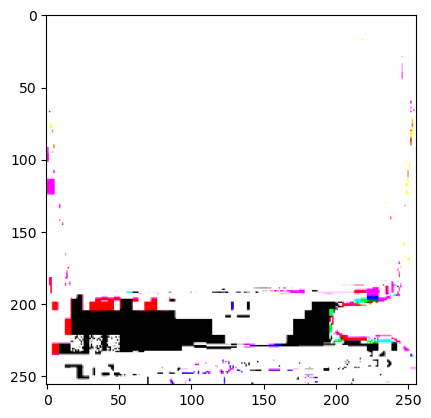

In [59]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())

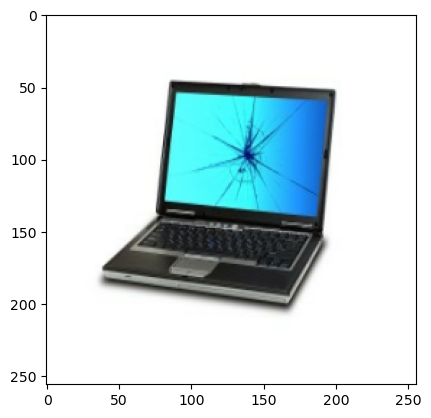

In [60]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

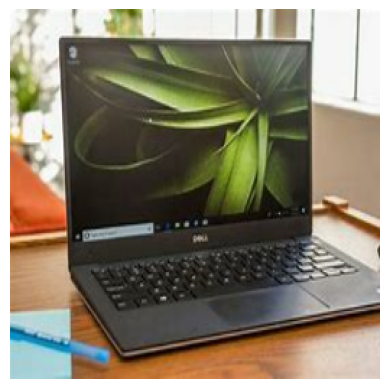

In [61]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    # it shuffles image everytime we run 

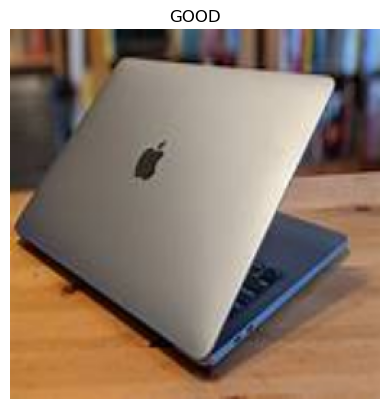

In [62]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    # it shuffles image everytime we run 

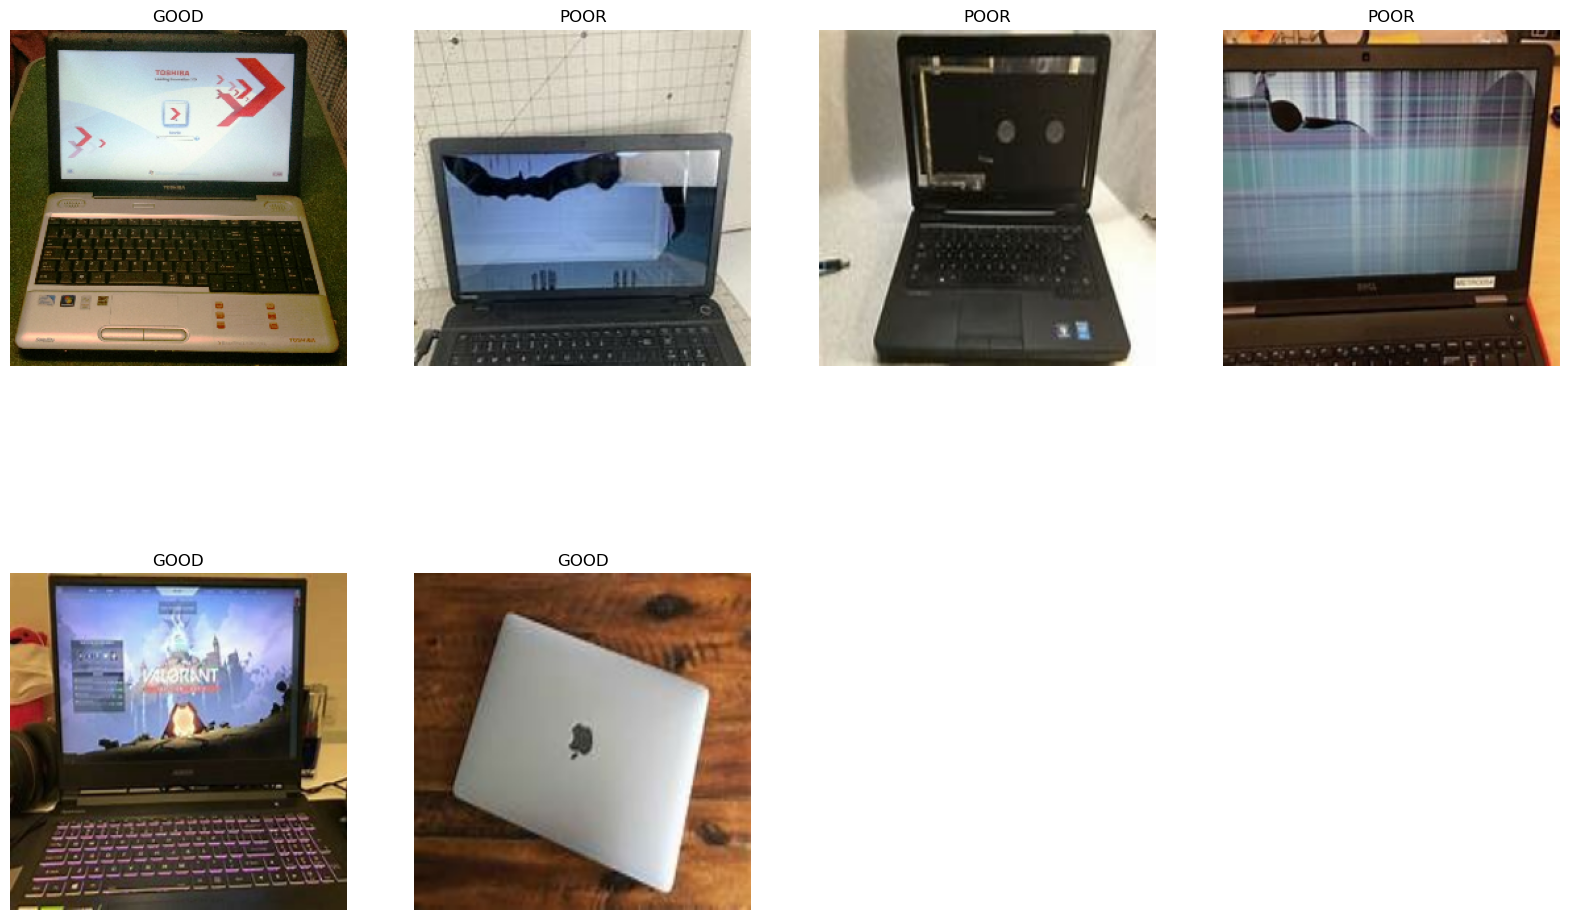

In [63]:
# for displaying i number of images in for loop 
plt.figure(figsize=(20,20))
for image_batch,label_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        # it shuffles image everytime we run 

In [64]:
# each element is 16 batch 
#dividing dataset into training testing data 
# 80% ==>training data 
# 20% ==> 10% ==> validation ,10% ==> test 
# since we do not have train_test_split in tf

In [65]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split =0.1,shuffle = True,shuffle_size=10000):
    ds_size =len(ds)
    if shuffle :
        ds=ds.shuffle(shuffle_size,seed =12)
    
    
    train_size = int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    
    train_ds=dataset.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    
    return train_ds,val_ds,test_ds


In [66]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [67]:
len(train_ds)

33

In [68]:
len(test_ds)

5

In [69]:
len(val_ds)

4

In [70]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [71]:
 resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [72]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),])

In [73]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model = models.Sequential ([ resize_and_rescale,
                              data_augmentation,
                              layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Flatten(),
                              layers.Dense(64,activation='relu'),
                              layers.Dense(n_classes,activation='softmax'),
                           
                           
                          ])
model.build(input_shape=input_shape)

In [74]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (6, 256, 256, 3)          0         
                                                                 
 sequential_4 (Sequential)   (6, 256, 256, 3)          0         
                                                                 
 conv2d_6 (Conv2D)           (6, 254, 254, 32)         896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (6, 127, 127, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (6, 125, 125, 64)         18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (6, 62, 62, 64)           0         
 g2D)                                                 

In [78]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [79]:
history =model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
33/33 [==============================] - 13s 332ms/step - loss: 0.7263 - accuracy: 0.5303 - val_loss: 0.7290 - val_accuracy: 0.4583
Epoch 2/50
33/33 [==============================] - 11s 330ms/step - loss: 0.6962 - accuracy: 0.5202 - val_loss: 0.7213 - val_accuracy: 0.5000
Epoch 3/50
33/33 [==============================] - 11s 342ms/step - loss: 0.6914 - accuracy: 0.5960 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 4/50
33/33 [==============================] - 12s 364ms/step - loss: 0.7487 - accuracy: 0.5758 - val_loss: 0.7079 - val_accuracy: 0.4167
Epoch 5/50
33/33 [==============================] - 12s 360ms/step - loss: 0.6724 - accuracy: 0.5404 - val_loss: 0.7308 - val_accuracy: 0.4583
Epoch 6/50
33/33 [==============================] - 12s 357ms/step - loss: 0.6712 - accuracy: 0.5859 - val_loss: 0.7655 - val_accuracy: 0.4167
Epoch 7/50
33/33 [==============================] - 12s 367ms/step - loss: 0.6618 - accuracy: 0.6010 - val_loss: 0.7554 - val_accuracy: 0.4167

In [80]:
scores=model.evaluate(test_ds)

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_22564]

In [81]:
scores

[0.5982192754745483, 0.6153846383094788]

In [82]:
history

In [83]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 33}

In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [85]:
history.history['accuracy']

[0.5303030014038086,
 0.5202020406723022,
 0.5959596037864685,
 0.5757575631141663,
 0.5404040217399597,
 0.5858585834503174,
 0.6010100841522217,
 0.6262626051902771,
 0.6010100841522217,
 0.5707070827484131,
 0.5454545617103577,
 0.6212121248245239,
 0.5909090638160706,
 0.631313145160675,
 0.5858585834503174,
 0.5707070827484131,
 0.5707070827484131,
 0.5858585834503174,
 0.6111111044883728,
 0.560606062412262,
 0.6212121248245239,
 0.6262626051902771,
 0.5959596037864685,
 0.6161616444587708,
 0.6212121248245239,
 0.6414141654968262,
 0.7171717286109924,
 0.7121211886405945,
 0.7222222089767456,
 0.747474730014801,
 0.7424242496490479,
 0.7323232293128967,
 0.7373737096786499,
 0.747474730014801,
 0.7727272510528564,
 0.7575757503509521,
 0.7626262903213501,
 0.7777777910232544,
 0.7979797720909119,
 0.7373737096786499,
 0.8131313323974609,
 0.8181818127632141,
 0.8131313323974609,
 0.752525269985199,
 0.7828282713890076,
 0.7929292917251587,
 0.8030303120613098,
 0.787878811359405

In [86]:
len(history.history['accuracy'])

50

In [87]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']


loss = history.history['loss']
val_loss =history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

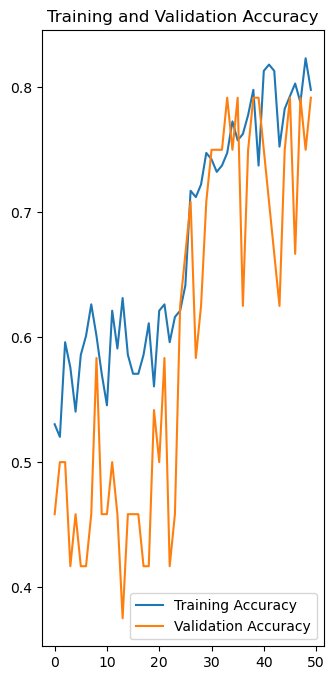

In [88]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

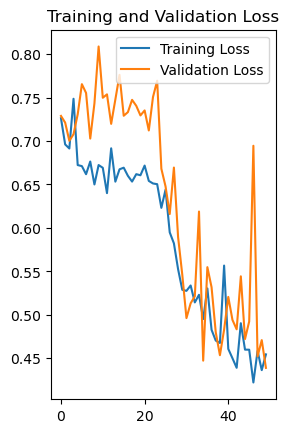

In [89]:
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

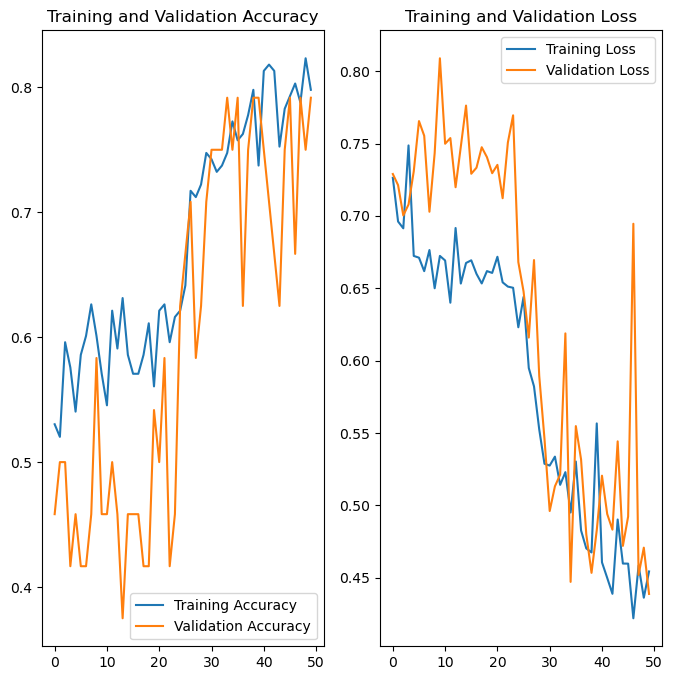

In [90]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict 
first image's actual label: GOOD
1/1 [==============================] - 0s 184ms/step
[0.45702353 0.54223084 0.00074563]
predicted label : POOR


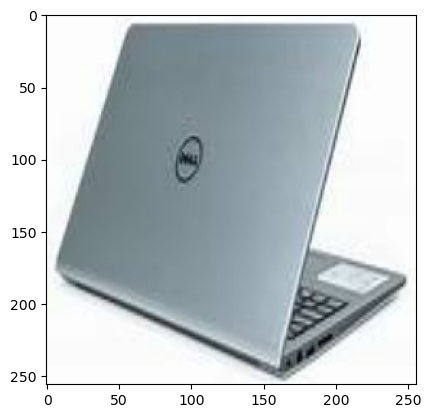

In [91]:
for image_batch,label_batch in dataset.take(1):
    first_image=(image_batch[0].numpy().astype("uint8"))
    first_label=label_batch[0].numpy()
    
    print("first image to predict ")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(batch_prediction[0])
    print("predicted label :",class_names[np.argmax(batch_prediction[0])])

In [92]:
np.argmax([3.2332787e-01 ,6.7614532e-01, 5.2684796e-04])

1

In [93]:
def predict(model,img):
    img_array= tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array= tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 39ms/step


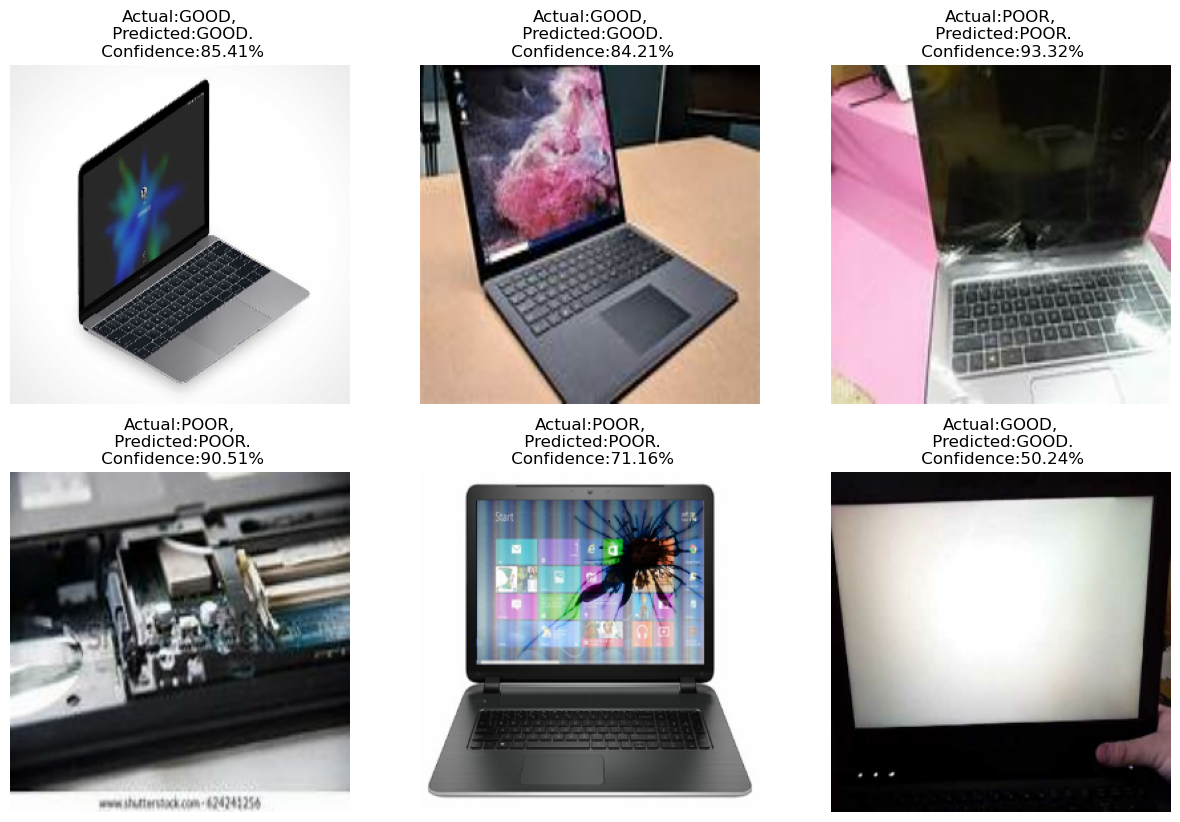

In [96]:
plt.figure(figsize=(15,15))
for image,labels in test_ds.take(1):
    for i in range (6):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,image[i].numpy())
        
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")

In [97]:
import os
model_version=1
model.save("laptop_health_predictor_model")

INFO:tensorflow:Assets written to: laptop_health_predictor_model\assets


INFO:tensorflow:Assets written to: laptop_health_predictor_model\assets


In [98]:
import os
model_version = max([int(i) for i in (os.listdir("./model_versions")+[0])])+1
model.save(f"./model_versions/{model_version}")

INFO:tensorflow:Assets written to: ./model_versions/4\assets


INFO:tensorflow:Assets written to: ./model_versions/4\assets


In [115]:
# converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")

In [ ]:
tflite_model = converter.convert()

In [ ]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)